In [6]:
# setup
import os
import torch
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
# local utils
# !find . -name \*.pyc -delete
from vis_utils import *
from model_def import *
from model_train import *

%matplotlib inline


expName = 'cifar-MLP_w1-500-w2-100_v5'
batchSize = 100

# create experiment folder
expDir = os.path.join('./data', expName)
if not os.path.exists(expDir):
    os.makedirs(expDir)

In [2]:
def flatten(img):
    shape = img.size()
    b = img.view(-1)
    return b

In [3]:
def setup_cifar_data_mlp(batchSize):   
    '''
        Setup data loaders for a fully-connected (MLP) network
        
        Images are flattened from 3x32x32 to 3072 vector
    
    '''
    
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
         torchvision.transforms.Lambda(flatten)])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchSize,
                                              shuffle=True, num_workers=2) # random shuffling for train dataloader

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batchSize,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
    return trainloader, testloader, classes

In [4]:
# setup and load CIFAR dataset
trainloader, testloader, classes = setup_cifar_data_mlp(batchSize)

Files already downloaded and verified
Files already downloaded and verified


  cat 	horse 	 deer 	  cat


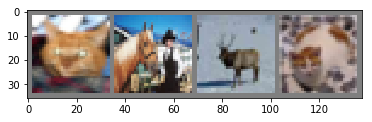

In [5]:
# Check some random images to confirm the flattening and reshaping of images is correct
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images[0:4]
labels = labels[0:4]
images = images.view(4, 3, 32, 32) # reshape flattened images to 3x32x32

imshow(torchvision.utils.make_grid(images))
print(' \t'.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
# create a fully-connected network with ReLU non-linearities
net = MLP(input_dim=3072, fc1_dim=500, fc2_dim=100)

# dispay the network architecture
print(net)

MLP (
  (fc1): Linear (3072 -> 500)
  (fc2): Linear (500 -> 100)
  (fc3): Linear (100 -> 10)
)


In [19]:
# Train the network

# hyper-params
useGpu = True
seed = 0  # for repeatable results
modelPath = []
numEpochs = 40
learningRate = 0.1

# set random seed
torch.default_generator.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Define a Loss function and optimizer settings
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learningRate, momentum=0.9, weight_decay=5e-4)

if not os.path.isfile(os.path.join(expDir, 'net-trained.dat')):
    # Train the network
    train_cifar_net(net, trainloader, testloader, criterion, optimizer, expDir, batchSize=batchSize,
                    numEpochs=numEpochs, useGpu=useGpu, fixFilterList=[], verboseFrequency=100, doVisFilter=False)

    # Save the network
    #    to be loaded as:
    #       net = Net()
    #       net.load_state_dict(torch.load(PATH))
    torch.save(net.state_dict(), os.path.join(expDir, 'net-trained.dat'))
else:
    print 'Loading network state dict from file.'
    net.load_state_dict(torch.load(os.path.join(expDir, 'net-trained.dat')))
    

  0%|          | 0/40 [00:00<?, ?it/s]

[1,   100] loss: 1.900 accu: 0.342 lr: 0.100000
[1,   200] loss: 1.779 accu: 0.398 lr: 0.100000
[1,   300] loss: 1.760 accu: 0.413 lr: 0.100000


  2%|▎         | 1/40 [00:09<06:09,  9.48s/it]

[2,   100] loss: 1.687 accu: 0.439 lr: 0.100000
[2,   200] loss: 1.679 accu: 0.443 lr: 0.100000
[2,   300] loss: 1.678 accu: 0.444 lr: 0.100000


  5%|▌         | 2/40 [00:20<06:12,  9.81s/it]

[3,   100] loss: 1.619 accu: 0.475 lr: 0.100000
[3,   200] loss: 1.649 accu: 0.453 lr: 0.100000
[3,   300] loss: 1.635 accu: 0.461 lr: 0.100000


  8%|▊         | 3/40 [00:31<06:22, 10.33s/it]

[4,   100] loss: 1.602 accu: 0.477 lr: 0.100000
[4,   200] loss: 1.589 accu: 0.482 lr: 0.100000
[4,   300] loss: 1.584 accu: 0.481 lr: 0.100000


 10%|█         | 4/40 [00:42<06:21, 10.60s/it]

[5,   100] loss: 1.553 accu: 0.499 lr: 0.100000
[5,   200] loss: 1.575 accu: 0.491 lr: 0.100000
[5,   300] loss: 1.581 accu: 0.486 lr: 0.100000


 12%|█▎        | 5/40 [00:52<05:57, 10.22s/it]

[6,   100] loss: 1.527 accu: 0.501 lr: 0.100000
[6,   200] loss: 1.544 accu: 0.501 lr: 0.100000
[6,   300] loss: 1.566 accu: 0.495 lr: 0.100000


 15%|█▌        | 6/40 [01:01<05:36,  9.88s/it]

[7,   100] loss: 1.501 accu: 0.515 lr: 0.100000
[7,   200] loss: 1.560 accu: 0.495 lr: 0.100000
[7,   300] loss: 1.558 accu: 0.490 lr: 0.100000


 18%|█▊        | 7/40 [01:10<05:21,  9.73s/it]

[8,   100] loss: 1.523 accu: 0.504 lr: 0.100000
[8,   200] loss: 1.530 accu: 0.504 lr: 0.100000
[8,   300] loss: 1.525 accu: 0.511 lr: 0.100000


 20%|██        | 8/40 [01:19<05:00,  9.39s/it]

[9,   100] loss: 1.500 accu: 0.523 lr: 0.100000
[9,   200] loss: 1.511 accu: 0.512 lr: 0.100000
[9,   300] loss: 1.533 accu: 0.512 lr: 0.100000


 22%|██▎       | 9/40 [01:29<04:59,  9.66s/it]

[10,   100] loss: 1.457 accu: 0.527 lr: 0.100000
[10,   200] loss: 1.509 accu: 0.513 lr: 0.100000
[10,   300] loss: 1.530 accu: 0.505 lr: 0.100000


 25%|██▌       | 10/40 [01:39<04:56,  9.87s/it]

[11,   100] loss: 1.462 accu: 0.531 lr: 0.100000
[11,   200] loss: 1.516 accu: 0.513 lr: 0.100000
[11,   300] loss: 1.519 accu: 0.514 lr: 0.100000


 28%|██▊       | 11/40 [01:49<04:40,  9.68s/it]

[12,   100] loss: 1.457 accu: 0.534 lr: 0.100000
[12,   200] loss: 1.513 accu: 0.517 lr: 0.100000
[12,   300] loss: 1.518 accu: 0.512 lr: 0.100000


 30%|███       | 12/40 [01:58<04:25,  9.50s/it]

[13,   100] loss: 1.464 accu: 0.530 lr: 0.100000
[13,   200] loss: 1.499 accu: 0.525 lr: 0.100000
[13,   300] loss: 1.505 accu: 0.517 lr: 0.100000


 32%|███▎      | 13/40 [02:07<04:17,  9.53s/it]

[14,   100] loss: 1.476 accu: 0.528 lr: 0.100000
[14,   200] loss: 1.496 accu: 0.522 lr: 0.100000
[14,   300] loss: 1.529 accu: 0.508 lr: 0.100000


 35%|███▌      | 14/40 [02:16<04:01,  9.31s/it]

[15,   100] loss: 1.446 accu: 0.541 lr: 0.100000
[15,   200] loss: 1.491 accu: 0.521 lr: 0.100000
[15,   300] loss: 1.504 accu: 0.514 lr: 0.100000


 38%|███▊      | 15/40 [02:25<03:52,  9.29s/it]

[16,   100] loss: 1.461 accu: 0.532 lr: 0.100000
[16,   200] loss: 1.486 accu: 0.521 lr: 0.100000
[16,   300] loss: 1.491 accu: 0.526 lr: 0.100000


 40%|████      | 16/40 [02:35<03:49,  9.55s/it]

[17,   100] loss: 1.424 accu: 0.547 lr: 0.100000
[17,   200] loss: 1.489 accu: 0.526 lr: 0.100000
[17,   300] loss: 1.492 accu: 0.520 lr: 0.100000


 42%|████▎     | 17/40 [02:46<03:48,  9.95s/it]

[18,   100] loss: 1.421 accu: 0.545 lr: 0.100000
[18,   200] loss: 1.473 accu: 0.535 lr: 0.100000
[18,   300] loss: 1.495 accu: 0.526 lr: 0.100000


 45%|████▌     | 18/40 [02:56<03:35,  9.81s/it]

[19,   100] loss: 1.442 accu: 0.544 lr: 0.100000
[19,   200] loss: 1.472 accu: 0.531 lr: 0.100000
[19,   300] loss: 1.501 accu: 0.519 lr: 0.100000


 48%|████▊     | 19/40 [03:06<03:26,  9.83s/it]

[20,   100] loss: 1.455 accu: 0.541 lr: 0.100000
[20,   200] loss: 1.480 accu: 0.526 lr: 0.100000
[20,   300] loss: 1.462 accu: 0.529 lr: 0.100000


 50%|█████     | 20/40 [03:15<03:14,  9.74s/it]

[21,   100] loss: 1.443 accu: 0.541 lr: 0.100000
[21,   200] loss: 1.434 accu: 0.542 lr: 0.100000
[21,   300] loss: 1.480 accu: 0.532 lr: 0.100000


 52%|█████▎    | 21/40 [03:26<03:08,  9.94s/it]

[22,   100] loss: 1.433 accu: 0.546 lr: 0.100000
[22,   200] loss: 1.460 accu: 0.537 lr: 0.100000
[22,   300] loss: 1.474 accu: 0.528 lr: 0.100000


 55%|█████▌    | 22/40 [03:35<02:54,  9.67s/it]

[23,   100] loss: 1.446 accu: 0.543 lr: 0.100000
[23,   200] loss: 1.472 accu: 0.528 lr: 0.100000
[23,   300] loss: 1.476 accu: 0.532 lr: 0.100000


 57%|█████▊    | 23/40 [03:45<02:46,  9.82s/it]

[24,   100] loss: 1.437 accu: 0.545 lr: 0.100000
[24,   200] loss: 1.462 accu: 0.530 lr: 0.100000
[24,   300] loss: 1.476 accu: 0.527 lr: 0.100000


 60%|██████    | 24/40 [03:54<02:33,  9.62s/it]

[25,   100] loss: 1.446 accu: 0.546 lr: 0.100000
[25,   200] loss: 1.455 accu: 0.535 lr: 0.100000
[25,   300] loss: 1.464 accu: 0.534 lr: 0.100000


 62%|██████▎   | 25/40 [04:05<02:32, 10.15s/it]

[26,   100] loss: 1.439 accu: 0.539 lr: 0.100000
[26,   200] loss: 1.472 accu: 0.528 lr: 0.100000
[26,   300] loss: 1.477 accu: 0.534 lr: 0.100000


 65%|██████▌   | 26/40 [04:14<02:17,  9.80s/it]

[27,   100] loss: 1.444 accu: 0.544 lr: 0.100000
[27,   200] loss: 1.476 accu: 0.529 lr: 0.100000
[27,   300] loss: 1.467 accu: 0.531 lr: 0.100000


 68%|██████▊   | 27/40 [04:24<02:05,  9.63s/it]

[28,   100] loss: 1.425 accu: 0.550 lr: 0.100000
[28,   200] loss: 1.457 accu: 0.542 lr: 0.100000
[28,   300] loss: 1.485 accu: 0.526 lr: 0.100000


 70%|███████   | 28/40 [04:34<01:57,  9.76s/it]

[29,   100] loss: 1.434 accu: 0.549 lr: 0.100000
[29,   200] loss: 1.441 accu: 0.540 lr: 0.100000
[29,   300] loss: 1.483 accu: 0.529 lr: 0.100000


 72%|███████▎  | 29/40 [04:43<01:47,  9.74s/it]

[30,   100] loss: 1.448 accu: 0.541 lr: 0.100000
[30,   200] loss: 1.458 accu: 0.536 lr: 0.100000
[30,   300] loss: 1.483 accu: 0.527 lr: 0.100000


 75%|███████▌  | 30/40 [04:52<01:34,  9.47s/it]

[31,   100] loss: 1.451 accu: 0.540 lr: 0.100000
[31,   200] loss: 1.446 accu: 0.542 lr: 0.100000
[31,   300] loss: 1.456 accu: 0.532 lr: 0.100000


 78%|███████▊  | 31/40 [05:02<01:24,  9.44s/it]

[32,   100] loss: 1.425 accu: 0.551 lr: 0.100000
[32,   200] loss: 1.459 accu: 0.542 lr: 0.100000
[32,   300] loss: 1.473 accu: 0.531 lr: 0.100000


 80%|████████  | 32/40 [05:11<01:15,  9.48s/it]

[33,   100] loss: 1.431 accu: 0.547 lr: 0.100000
[33,   200] loss: 1.476 accu: 0.533 lr: 0.100000
[33,   300] loss: 1.470 accu: 0.535 lr: 0.100000


 82%|████████▎ | 33/40 [05:22<01:08,  9.77s/it]

[34,   100] loss: 1.416 accu: 0.552 lr: 0.100000
[34,   200] loss: 1.467 accu: 0.536 lr: 0.100000
[34,   300] loss: 1.461 accu: 0.532 lr: 0.100000


 85%|████████▌ | 34/40 [05:32<00:59,  9.98s/it]

[35,   100] loss: 1.408 accu: 0.556 lr: 0.100000
[35,   200] loss: 1.440 accu: 0.536 lr: 0.100000
[35,   300] loss: 1.483 accu: 0.528 lr: 0.100000


 88%|████████▊ | 35/40 [05:42<00:49,  9.91s/it]

[36,   100] loss: 1.434 accu: 0.545 lr: 0.100000
[36,   200] loss: 1.469 accu: 0.535 lr: 0.100000
[36,   300] loss: 1.465 accu: 0.535 lr: 0.100000


 90%|█████████ | 36/40 [05:51<00:38,  9.67s/it]

[37,   100] loss: 1.447 accu: 0.543 lr: 0.100000
[37,   200] loss: 1.471 accu: 0.530 lr: 0.100000
[37,   300] loss: 1.449 accu: 0.540 lr: 0.100000


 92%|█████████▎| 37/40 [06:04<00:31, 10.67s/it]

[38,   100] loss: 1.413 accu: 0.556 lr: 0.100000
[38,   200] loss: 1.435 accu: 0.547 lr: 0.100000
[38,   300] loss: 1.493 accu: 0.519 lr: 0.100000


 95%|█████████▌| 38/40 [06:14<00:20, 10.42s/it]

[39,   100] loss: 1.410 accu: 0.560 lr: 0.100000
[39,   200] loss: 1.435 accu: 0.546 lr: 0.100000
[39,   300] loss: 1.462 accu: 0.535 lr: 0.100000


 98%|█████████▊| 39/40 [06:24<00:10, 10.25s/it]

[40,   100] loss: 1.416 accu: 0.555 lr: 0.100000
[40,   200] loss: 1.459 accu: 0.539 lr: 0.100000
[40,   300] loss: 1.460 accu: 0.537 lr: 0.100000


100%|██████████| 40/40 [06:33<00:00,  9.96s/it]

Finished Training


In [24]:
# [Optional] Resume training with lower learning rate for 10 epochs

# load last saved model
modelPath = os.path.join(expDir, 'net-trained.dat')
net = MLP(input_dim=3072, fc1_dim=100, fc2_dim=100)
net.load_state_dict(torch.load(modelPath))

# change learning rate and new output directory
numEpochs = 40
optimizer = optim.SGD(net.parameters(), lr=learningRate/10, momentum=0.9, weight_decay=5e-4)
expDir = expDir + '-01'
if not os.path.exists(expDir):
    os.makedirs(expDir)


if not os.path.isfile(os.path.join(expDir, 'net-trained.dat')):
    # Train the network
    train_cifar_net(net, trainloader, testloader, criterion, optimizer, expDir, batchSize=batchSize,
                    numEpochs=numEpochs, useGpu=useGpu, fixFilterList=[], verboseFrequency=100)

    # Save the network
    #    to be loaded as:
    #       net = Net()
    #       net.load_state_dict(torch.load(PATH))
    torch.save(net.state_dict(), os.path.join(expDir, 'net-trained.dat'))
else:
    print 'Loading network state dict from file.'
    net.load_state_dict(torch.load(os.path.join(expDir, 'net-trained.dat')))

  0%|          | 0/40 [00:00<?, ?it/s]

[1,   100] loss: 1.258 accu: 0.565 lr: 0.010000
[1,   200] loss: 1.179 accu: 0.595 lr: 0.010000
[1,   300] loss: 1.116 accu: 0.614 lr: 0.010000


  2%|▎         | 1/40 [00:09<06:26,  9.92s/it]

[2,   100] loss: 1.063 accu: 0.627 lr: 0.010000
[2,   200] loss: 1.076 accu: 0.623 lr: 0.010000
[2,   300] loss: 1.049 accu: 0.632 lr: 0.010000


  5%|▌         | 2/40 [00:20<06:23, 10.09s/it]

[3,   100] loss: 1.018 accu: 0.641 lr: 0.010000
[3,   200] loss: 1.024 accu: 0.638 lr: 0.010000
[3,   300] loss: 1.001 accu: 0.648 lr: 0.010000


  8%|▊         | 3/40 [00:32<06:38, 10.76s/it]

[4,   100] loss: 0.975 accu: 0.657 lr: 0.010000
[4,   200] loss: 0.960 accu: 0.660 lr: 0.010000
[4,   300] loss: 0.998 accu: 0.651 lr: 0.010000


 10%|█         | 4/40 [00:43<06:31, 10.89s/it]

[5,   100] loss: 0.949 accu: 0.669 lr: 0.010000
[5,   200] loss: 0.948 accu: 0.669 lr: 0.010000
[5,   300] loss: 0.954 accu: 0.665 lr: 0.010000


 12%|█▎        | 5/40 [00:54<06:19, 10.85s/it]

[6,   100] loss: 0.917 accu: 0.681 lr: 0.010000
[6,   200] loss: 0.920 accu: 0.678 lr: 0.010000
[6,   300] loss: 0.944 accu: 0.670 lr: 0.010000


 15%|█▌        | 6/40 [01:04<06:00, 10.61s/it]

[7,   100] loss: 0.890 accu: 0.688 lr: 0.010000
[7,   200] loss: 0.915 accu: 0.680 lr: 0.010000
[7,   300] loss: 0.919 accu: 0.683 lr: 0.010000


 18%|█▊        | 7/40 [01:14<05:44, 10.45s/it]

[8,   100] loss: 0.876 accu: 0.696 lr: 0.010000
[8,   200] loss: 0.883 accu: 0.693 lr: 0.010000
[8,   300] loss: 0.900 accu: 0.686 lr: 0.010000


 20%|██        | 8/40 [01:24<05:25, 10.16s/it]

[9,   100] loss: 0.860 accu: 0.703 lr: 0.010000
[9,   200] loss: 0.872 accu: 0.696 lr: 0.010000
[9,   300] loss: 0.882 accu: 0.696 lr: 0.010000


 22%|██▎       | 9/40 [01:36<05:34, 10.78s/it]

[10,   100] loss: 0.832 accu: 0.711 lr: 0.010000
[10,   200] loss: 0.863 accu: 0.707 lr: 0.010000
[10,   300] loss: 0.881 accu: 0.696 lr: 0.010000


 25%|██▌       | 10/40 [01:45<05:08, 10.28s/it]

[11,   100] loss: 0.830 accu: 0.709 lr: 0.010000
[11,   200] loss: 0.850 accu: 0.709 lr: 0.010000
[11,   300] loss: 0.854 accu: 0.709 lr: 0.010000


 28%|██▊       | 11/40 [01:56<05:01, 10.40s/it]

[12,   100] loss: 0.804 accu: 0.730 lr: 0.010000
[12,   200] loss: 0.830 accu: 0.715 lr: 0.010000
[12,   300] loss: 0.844 accu: 0.712 lr: 0.010000


 30%|███       | 12/40 [02:08<05:03, 10.83s/it]

[13,   100] loss: 0.796 accu: 0.726 lr: 0.010000
[13,   200] loss: 0.818 accu: 0.722 lr: 0.010000
[13,   300] loss: 0.823 accu: 0.721 lr: 0.010000


 32%|███▎      | 13/40 [02:19<04:55, 10.95s/it]

[14,   100] loss: 0.777 accu: 0.736 lr: 0.010000
[14,   200] loss: 0.796 accu: 0.732 lr: 0.010000
[14,   300] loss: 0.826 accu: 0.726 lr: 0.010000


 35%|███▌      | 14/40 [02:29<04:37, 10.69s/it]

[15,   100] loss: 0.763 accu: 0.745 lr: 0.010000
[15,   200] loss: 0.803 accu: 0.728 lr: 0.010000
[15,   300] loss: 0.799 accu: 0.732 lr: 0.010000


 38%|███▊      | 15/40 [02:39<04:20, 10.42s/it]

[16,   100] loss: 0.756 accu: 0.746 lr: 0.010000
[16,   200] loss: 0.785 accu: 0.735 lr: 0.010000
[16,   300] loss: 0.788 accu: 0.737 lr: 0.010000


 40%|████      | 16/40 [02:50<04:13, 10.54s/it]

[17,   100] loss: 0.739 accu: 0.752 lr: 0.010000
[17,   200] loss: 0.759 accu: 0.748 lr: 0.010000
[17,   300] loss: 0.787 accu: 0.736 lr: 0.010000


 42%|████▎     | 17/40 [02:59<03:53, 10.13s/it]

[18,   100] loss: 0.739 accu: 0.759 lr: 0.010000
[18,   200] loss: 0.748 accu: 0.750 lr: 0.010000
[18,   300] loss: 0.767 accu: 0.741 lr: 0.010000


 45%|████▌     | 18/40 [03:09<03:42, 10.13s/it]

[19,   100] loss: 0.731 accu: 0.763 lr: 0.010000
[19,   200] loss: 0.744 accu: 0.754 lr: 0.010000
[19,   300] loss: 0.763 accu: 0.747 lr: 0.010000


 48%|████▊     | 19/40 [03:18<03:25,  9.79s/it]

[20,   100] loss: 0.707 accu: 0.767 lr: 0.010000
[20,   200] loss: 0.738 accu: 0.762 lr: 0.010000
[20,   300] loss: 0.737 accu: 0.757 lr: 0.010000


 50%|█████     | 20/40 [03:29<03:23, 10.17s/it]

[21,   100] loss: 0.711 accu: 0.766 lr: 0.010000
[21,   200] loss: 0.709 accu: 0.766 lr: 0.010000
[21,   300] loss: 0.739 accu: 0.755 lr: 0.010000


 52%|█████▎    | 21/40 [03:40<03:20, 10.55s/it]

[22,   100] loss: 0.696 accu: 0.777 lr: 0.010000
[22,   200] loss: 0.710 accu: 0.769 lr: 0.010000
[22,   300] loss: 0.727 accu: 0.763 lr: 0.010000


 55%|█████▌    | 22/40 [03:50<03:06, 10.35s/it]

[23,   100] loss: 0.692 accu: 0.775 lr: 0.010000
[23,   200] loss: 0.702 accu: 0.773 lr: 0.010000
[23,   300] loss: 0.730 accu: 0.762 lr: 0.010000


 57%|█████▊    | 23/40 [04:01<02:57, 10.46s/it]

[24,   100] loss: 0.682 accu: 0.783 lr: 0.010000
[24,   200] loss: 0.697 accu: 0.773 lr: 0.010000
[24,   300] loss: 0.734 accu: 0.761 lr: 0.010000


 60%|██████    | 24/40 [04:12<02:50, 10.66s/it]

[25,   100] loss: 0.682 accu: 0.781 lr: 0.010000
[25,   200] loss: 0.697 accu: 0.777 lr: 0.010000
[25,   300] loss: 0.703 accu: 0.770 lr: 0.010000


 62%|██████▎   | 25/40 [04:24<02:45, 11.05s/it]

[26,   100] loss: 0.659 accu: 0.788 lr: 0.010000
[26,   200] loss: 0.698 accu: 0.777 lr: 0.010000
[26,   300] loss: 0.711 accu: 0.773 lr: 0.010000


 65%|██████▌   | 26/40 [04:35<02:34, 11.04s/it]

[27,   100] loss: 0.643 accu: 0.795 lr: 0.010000
[27,   200] loss: 0.674 accu: 0.788 lr: 0.010000
[27,   300] loss: 0.692 accu: 0.772 lr: 0.010000


 68%|██████▊   | 27/40 [04:46<02:21, 10.91s/it]

[28,   100] loss: 0.657 accu: 0.793 lr: 0.010000
[28,   200] loss: 0.676 accu: 0.785 lr: 0.010000
[28,   300] loss: 0.680 accu: 0.786 lr: 0.010000


 70%|███████   | 28/40 [04:56<02:10, 10.86s/it]

[29,   100] loss: 0.646 accu: 0.795 lr: 0.010000
[29,   200] loss: 0.637 accu: 0.801 lr: 0.010000
[29,   300] loss: 0.679 accu: 0.784 lr: 0.010000


 72%|███████▎  | 29/40 [05:07<01:57, 10.66s/it]

[30,   100] loss: 0.639 accu: 0.802 lr: 0.010000
[30,   200] loss: 0.652 accu: 0.794 lr: 0.010000
[30,   300] loss: 0.656 accu: 0.793 lr: 0.010000


 75%|███████▌  | 30/40 [05:19<01:52, 11.26s/it]

[31,   100] loss: 0.624 accu: 0.804 lr: 0.010000
[31,   200] loss: 0.636 accu: 0.800 lr: 0.010000
[31,   300] loss: 0.659 accu: 0.795 lr: 0.010000


 78%|███████▊  | 31/40 [05:31<01:41, 11.28s/it]

[32,   100] loss: 0.608 accu: 0.813 lr: 0.010000
[32,   200] loss: 0.643 accu: 0.797 lr: 0.010000
[32,   300] loss: 0.681 accu: 0.783 lr: 0.010000


 80%|████████  | 32/40 [05:41<01:27, 10.94s/it]

[33,   100] loss: 0.615 accu: 0.810 lr: 0.010000
[33,   200] loss: 0.629 accu: 0.807 lr: 0.010000
[33,   300] loss: 0.652 accu: 0.791 lr: 0.010000


 82%|████████▎ | 33/40 [05:52<01:17, 11.12s/it]

[34,   100] loss: 0.600 accu: 0.815 lr: 0.010000
[34,   200] loss: 0.626 accu: 0.806 lr: 0.010000
[34,   300] loss: 0.639 accu: 0.801 lr: 0.010000


 85%|████████▌ | 34/40 [06:02<01:04, 10.82s/it]

[35,   100] loss: 0.601 accu: 0.814 lr: 0.010000
[35,   200] loss: 0.613 accu: 0.809 lr: 0.010000
[35,   300] loss: 0.635 accu: 0.802 lr: 0.010000


 88%|████████▊ | 35/40 [06:13<00:53, 10.62s/it]

[36,   100] loss: 0.597 accu: 0.819 lr: 0.010000
[36,   200] loss: 0.610 accu: 0.814 lr: 0.010000
[36,   300] loss: 0.641 accu: 0.800 lr: 0.010000


 90%|█████████ | 36/40 [06:27<00:46, 11.61s/it]

[37,   100] loss: 0.570 accu: 0.827 lr: 0.010000
[37,   200] loss: 0.603 accu: 0.816 lr: 0.010000
[37,   300] loss: 0.635 accu: 0.804 lr: 0.010000


 92%|█████████▎| 37/40 [06:36<00:33, 11.02s/it]

[38,   100] loss: 0.583 accu: 0.823 lr: 0.010000
[38,   200] loss: 0.607 accu: 0.816 lr: 0.010000
[38,   300] loss: 0.640 accu: 0.804 lr: 0.010000


 95%|█████████▌| 38/40 [06:46<00:21, 10.72s/it]

[39,   100] loss: 0.559 accu: 0.833 lr: 0.010000
[39,   200] loss: 0.592 accu: 0.821 lr: 0.010000
[39,   300] loss: 0.627 accu: 0.806 lr: 0.010000


 98%|█████████▊| 39/40 [06:56<00:10, 10.38s/it]

[40,   100] loss: 0.571 accu: 0.827 lr: 0.010000
[40,   200] loss: 0.582 accu: 0.822 lr: 0.010000
[40,   300] loss: 0.589 accu: 0.822 lr: 0.010000


100%|██████████| 40/40 [07:06<00:00, 10.37s/it]

Finished Training


In [26]:
fc1Params = list(net.fc1.parameters())
w = fc1Params[0].data.numpy() # filters
w.shape

(100, 3072)

In [27]:
import PIL as pil

plt.rcParams["figure.figsize"] = (10,10)

f = plt.figure()
subplotCounter = 1

for j in range(100):

    w1 = w[j].reshape(3, 32, 32)
    w1 = np.transpose(w1, (1,2,0))
    
    # rescale pixel values
    low, high = np.min(w1), np.max(w1)
    im1 = 255.0 * (w1 - low) / (high - low)
    # im1 = (w1 - low) / (high - low)
    
    ax = f.add_subplot(10, 10, subplotCounter)
    ax.imshow(im1.astype('uint8'))
    # ax.imshow(im1)
    subplotCounter += 1
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
# plt.tight_layout()
f.savefig(os.path.join(expDir,'mlp-filter-01.png'), bbox_inches='tight')

In [30]:
similMat, w = get_layer_cosine_similarity(net, 'fc1.weight')
# plt.imshow(similMat)
# plt.colorbar()

In [29]:
# Plot most similar filter PAIRS (within 95-th percentile of max cosine similarity in a layer)


MAX_PAIRS = 10

outDir = expDir
    

# get indices and mask array of lower-triangular matrix
sz = similMat.shape
offdiagIndices = np.tril_indices(sz[0], k=-1) # below diagonal
offdiagVal = similMat[offdiagIndices] 
maskTril = np.zeros(sz, dtype=bool) # boolean array same shape as similMat
maskTril[offdiagIndices] = True

# get the 95-th percentile of cosine similarity
similThresh = np.percentile(offdiagVal, 95)
maskLargeSimil = np.greater(similMat, similThresh)
rowId, colId = np.nonzero(maskLargeSimil & maskTril)

# sort these in order of similarity
similValues = similMat[rowId, colId]
pairList = zip(similValues.tolist(), rowId.tolist(), colId.tolist() )
pairList.sort()
pairList.reverse() # descending

K = np.min([len(pairList), MAX_PAIRS]) # number of filter pairs to display

# figure settings - display closest pairs
plt.rcParams["figure.figsize"] = (2,K) # (width, height)
f = plt.figure()
subplotCounter = 1

for j in range(K):

    listItem = pairList[j] # (similarity, rowId, colId)

    w1 = w[listItem[1]]
    w1 = w1.reshape(3, 32, 32)
    w1 = np.transpose(w1, (1,2,0))
    low, high = np.min(w1), np.max(w1)
    im1 = 255.0 * (w1 - low) / (high - low)
    ax = f.add_subplot(K,2, subplotCounter)
    ax.imshow(im1.astype('uint8'))
    subplotCounter += 1
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel('Cosine:')

    w2 = w[listItem[2]]
    w2 = w2.reshape(3, 32, 32)
    w2 = np.transpose(w2, (1,2,0))
    # rescale pixel values
    low, high = np.min(w2), np.max(w2)
    im2 = 255.0 * (w2 - low) / (high - low)
    ax = f.add_subplot(K,2, subplotCounter)
    ax.imshow(im2.astype('uint8'))
    subplotCounter += 1
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('%.3f' % listItem[0])

# f.suptitle('Closest filter pairs: conv1-'+str(i), fontsize=20)
plt.tight_layout()
f.savefig(os.path.join(outDir,'nearest-filter-pairs.png'), bbox_inches='tight')
# plt.close(f)    

# reset matplotlib figure size to defaults
plt.rcParams.update(plt.rcParamsDefault)

    
    

In [18]:
w1.shape

(3072,)